In [1]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [2]:
num_classes = 3
input_shape = (227,227,3)
imgWidth = 227
imgHeight = 227

# AlexNet model
class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= input_shape,
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None)) 

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(1000, activation= 'relu'))
        self.add(Dense(num_classes, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
model = AlexNet(input_shape, num_classes)

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

featuredDataset = './Dataset/Featured/'
augmentedDataset = './Dataset/Augmented/'
dataset = os.listdir(featuredDataset)

for data in dataset:
    pathData = os.path.join(featuredDataset,data)
    allImages = os.listdir(pathData)
    savePath = os.path.join(augmentedDataset,data)
    
    for image in allImages:
        imagePath = os.path.join(pathData,image)
        img = load_img(imagePath)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        
        i = 0
        for batch in datagen.flow(
            x,
            batch_size=1,
            save_to_dir = savePath 
            ,save_format = 'jpg') :
            
            i += 1
            if i > 6:
                break

C:\Users\my\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\my\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [4]:
import keras, os, cv2
import pandas as pd
import numpy as np

datasets = os.listdir(augmentedDataset)

labels=[i for i in range(len(datasets))]
print(labels)
label_dict=dict(zip(datasets,labels))
print(label_dict)

[0, 1, 2]
{'Jatropa': 0, 'KudaluDehi': 1, 'Mango': 2}


In [5]:
# Create two empty list for images and targets
images=[]
target=[]

# Resize and append Images to the Image list and append label to the Label list
for plant in datasets:
  folderPath = os.path.join(augmentedDataset,plant)
  imgNames = os.listdir(folderPath)
    
  for imgName in imgNames:
    imgPath = os.path.join(folderPath, imgName)
    img = cv2.imread(imgPath)
    images.append(img)
    target.append(label_dict[plant])

In [6]:
from keras.utils import np_utils

images = np.array(images)
target = np.array(target)
# target = target.reshape(len(target),1)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,target,test_size=.3)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((2937, 227, 227, 3), (2937,))
((1259, 227, 227, 3), (1259,))
((1799, 227, 227, 3), (1799,))


In [8]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train = to_categorical(y_train,num_classes)
y_val = to_categorical(y_val,num_classes)
y_test = to_categorical(y_test,num_classes)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((2937, 227, 227, 3), (2937, 3))
((1259, 227, 227, 3), (1259, 3))
((1799, 227, 227, 3), (1799, 3))


In [9]:
# Training Parameters
EPOCHS = 25
BATCH_SIZE = 100
image_height = 227
image_width = 227

In [10]:
# Training the model
hist = model.fit(
    x_train, y_train,
    epochs = EPOCHS,
    steps_per_epoch = x_train.shape[0]//BATCH_SIZE,
    validation_split=0.2,
    validation_steps = x_test.shape[0]//BATCH_SIZE,
    verbose=1,
)

Epoch 1/25
29/29 [==============================] - 125s 4s/step - loss: 15135.5172 - accuracy: 0.3602 - val_loss: 2.3386 - val_accuracy: 0.2857
Epoch 2/25
29/29 [==============================] - 115s 4s/step - loss: 1.1670 - accuracy: 0.5360 - val_loss: 0.3269 - val_accuracy: 0.8503
Epoch 3/25
29/29 [==============================] - 111s 4s/step - loss: 0.2646 - accuracy: 0.9055 - val_loss: 0.1294 - val_accuracy: 0.9507
Epoch 4/25
29/29 [==============================] - 113s 4s/step - loss: 0.0713 - accuracy: 0.9741 - val_loss: 0.0987 - val_accuracy: 0.9677
Epoch 5/25
29/29 [==============================] - 113s 4s/step - loss: 0.3100 - accuracy: 0.9061 - val_loss: 0.0506 - val_accuracy: 0.9847
Epoch 6/25
29/29 [==============================] - 113s 4s/step - loss: 0.0371 - accuracy: 0.9911 - val_loss: 0.0369 - val_accuracy: 0.9881
Epoch 7/25
29/29 [==============================] - 113s 4s/step - loss: 0.0131 - accuracy: 0.9977 - val_loss: 0.0218 - val_accuracy: 0.9932
Epoch 8/2

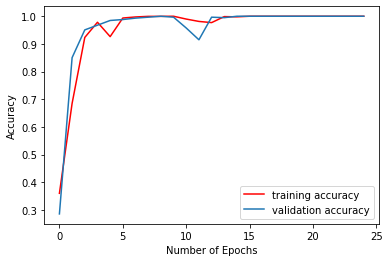

In [11]:
# Plot Graph
from matplotlib import pyplot as plt

plt.plot(hist.history['accuracy'],'r',label='training accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

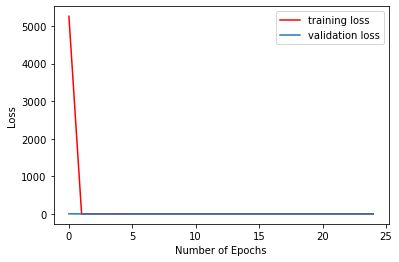

In [12]:
plt.plot(hist.history['loss'],'r',label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
y_pred=model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

C:\Users\my\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [14]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = (accuracy_score(y_true, y_pred))
acc_score

1.0

In [15]:
#Defining function for confusion matrix plot
import matplotlib.pyplot as plt  

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Normalized confusion matrix


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

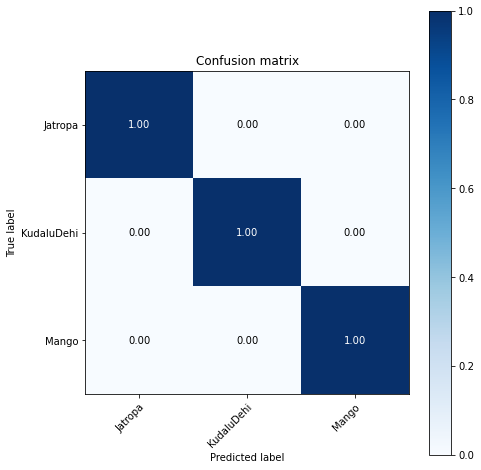

In [16]:
# Making prediction
y_pred=model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['Jatropa', 'KudaluDehi', 'Mango']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix')

In [17]:
# Make Predictions

def prediction(model,image):
    
    imagePath = image
    img = cv2.imread(image)
    
    width = int(img.shape[1])
    height = int(img.shape[0])
    
    borderType = cv2.BORDER_CONSTANT
    colorBorder = [255, 255, 255]
    increaseSize = 500

    if (height > width) :
        h = int((height-width)/2)
        hmax = int(h + increaseSize)
        output = cv2.copyMakeBorder(img, increaseSize, increaseSize, hmax, hmax, borderType, None, colorBorder)
    elif (height < width) :
        w = int((width-height)/2)
        wmax = int(w + increaseSize)
        output = cv2.copyMakeBorder(img, wmax, wmax, increaseSize, increaseSize, borderType, None, colorBorder)
    else :
        output = cv2.copyMakeBorder(img, 0, 0, 0, 0, borderType, None, colorBorder)
        
        # Resize to Alexnet Image Size
        width = int(227)
        height = int(227)
    
        dsize = (width, height)
        outputImg = cv2.resize(output, dsize)
    
    images = []
    images.append(outputImg)
    imgArr = np.array(images)
    
    prediction = model.predict(imgArr)

    return prediction

In [18]:
prediction(model,'./Dataset/TestData/1.jpg') # Kudalu Dehi

array([[1.17e-13, 1.00e+00, 1.92e-10]], dtype=float32)

In [19]:
prediction(model,'./Dataset/TestData/1.jpg')

array([[1.17e-13, 1.00e+00, 1.92e-10]], dtype=float32)

In [20]:
prediction(model,'./Dataset/TestData/1.jpg')

array([[1.17e-13, 1.00e+00, 1.92e-10]], dtype=float32)

In [21]:
# Save Model as .h5 file
modelName = 'alexnet-aayu.h5'
keras.models.save_model(model, modelName)

In [22]:
# Convert Model to .tflite

TF_LITE_MODEL_FILE_NAME = "./alexnet-aayu.tflite"

tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\my\AppData\Local\Temp\tmpk7m93tix\assets


249530860